In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.style.use('ggplot')
from sklearn.datasets import make_blobs
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import train_test_split

---
#Logistic Regression Demo 2
---

In [4]:
def decision_boundary_2(clf, xlowlimit, xhighlimit, ylowlimit, yhighlimit, tol):
    '''This function is used to determine points near the decision boundary. Rather than determine when 
    the hypothesis function is returning close to 0, this version of the function looks at the model 
    probability, checking for it to be near 0.5'''

    #Equally spaced points between user supplied limits
    x1 = np.linspace(xlowlimit, xhighlimit, 150)
    x2 = np.linspace(ylowlimit, yhighlimit, 150)

    #The decision boundary list
    db = []
    
    #Traverse the 2-dimensions and check the probability using the supplied logistic regression model
    for xx1 in x1:
        for xx2 in x2:
            
            #Get the 2-dimensional points ready to use in the model
            inX = [[xx1, xx2]]
            
            #Get the probability estimated for the points by the model
            probs = clf.predict_proba(inX).ravel()
            
            #If the probability is close to 0.5 then add the points to the list of decision boundary points
            if np.fabs(probs[0]-0.5) < tol:
                db.append([xx1, xx2])

    db = np.array(db)
    return db

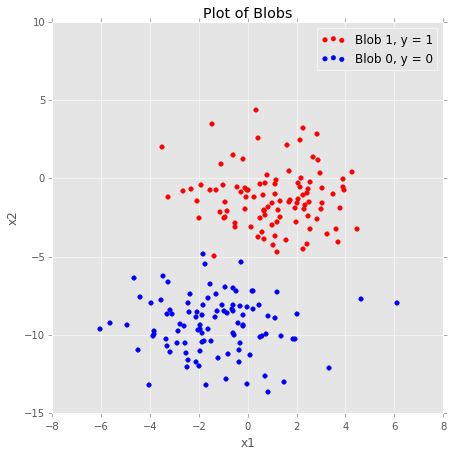

In [5]:
#Use the blobs functionality again
m = 200
N = 2
num_blobs = 2

X, y = make_blobs(n_samples = m, n_features = N, centers=num_blobs, cluster_std=1.80, random_state=2)

fig = plt.figure(figsize = (7,7))
ax = plt.subplot(111)
ax.scatter(X[y == 1,0], X[y == 1,1], color='red', label='Blob 1, y = 1')
ax.scatter(X[y == 0,0], X[y == 0,1], color='blue', label='Blob 0, y = 0')
ax.set_title("Plot of Blobs")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.legend(loc='best')

In [6]:
#Fit a standard logistic regression model
#NB: This dataset is not linearly separable because of a single data point!

clfLR1 = LogisticRegression() 
clfLR1.fit(X, y)
cm =pd.crosstab(y, clfLR1.predict(X), rownames=["Actual"], colnames=["Predicted"])
cm

Predicted,0,1
Actual,,
0,100,0
1,1,99


In [7]:
#Use the pipeline to provide some non-linear features to, hopefully, obtain a decision boundary that can work it's
#way to include the single rogue point

clfLRP1 = make_pipeline(PolynomialFeatures(3), LogisticRegression(C=15.0))
clfLRP1.fit(X, y)
cm = pd.crosstab(y, clfLRP1.predict(X),rownames=["Actual"], colnames=["Predicted"])
cm

Predicted,0,1
Actual,,
0,100,0
1,0,100


---
##Accessing probabilities, and class prediction from the model
---

In [20]:
print "The probabilities for the point -2, -10 are: {:5.4f} {:5.4f}".\
format(clfLR1.predict_proba([[-2.0, -10.0]]).ravel()[0], clfLR1.predict_proba([[-2.0, -10.0]]).ravel()[1])
print "The point belongs to class {:d}".format(clfLR1.predict([[-2.0, -10.0]]).ravel()[0])
print "The probabilities for the point 4, 0 are: {:5.4f} {:5.4f}".\
format(clfLR1.predict_proba([[4.0, 0.0]]).ravel()[0],clfLR1.predict_proba([[4.0, 0.0]]).ravel()[1])
print "The probabilities for the point 4, 5 are: {:5.6f} {:5.6f}".\
format(clfLR1.predict_proba([[4.0, 5.0]]).ravel()[0], clfLR1.predict_proba([[4.0, 5.0]]).ravel()[1])
print "The point belongs to class {:d}".format(clfLR1.predict([[4.0, 5.0]]).ravel()[0])

The probabilities for the point -2, -10 are: 0.9966 0.0034
The point belongs to class 0
The probabilities for the point 4, 0 are: 0.0027 0.9973
The probabilities for the point 4, 5 are: 0.000029 0.999971
The point belongs to class 1


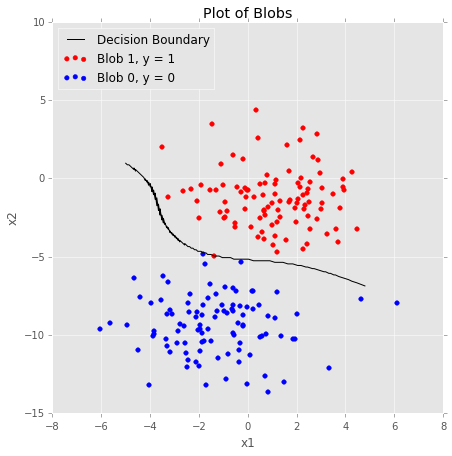

In [21]:
#Let's try to plot the decision boundary

fig = plt.figure(figsize = (7,7))
ax = plt.subplot(111)
ax.scatter(X[y == 1,0], X[y == 1,1], color='red', label='Blob 1, y = 1')
ax.scatter(X[y == 0,0], X[y == 0,1], color='blue', label='Blob 0, y = 0')
db = decision_boundary_2(clfLRP1, -5, 5, -10, 5, 0.095)
ax.plot(db[:,0], db[:,1], 'k-', label='Decision Boundary')
ax.set_title("Plot of Blobs")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.legend(loc='upper left')

---
##Now let's look at the example of 2 classes, one 'inside' the other
---

In [24]:
#Carefully craft the data
m = 100

X = np.zeros((m, 2), dtype=np.float)
y = np.zeros(m, dtype=np.int)

count=0
count1=m/2
for i in xrange(100000):
    j=(np.random.sample()-0.5)*3.0
    k=(np.random.sample()-0.5)*3.0
    
    #inside - class 0
    if (np.abs(j)+np.abs(k)<0.9)& (count<m/2):
        X[count][0]=j
        X[count][1]=k
        y[count] = 0
        count += 1
        
    #outside - class 1
    elif (np.abs(j)+np.abs(k)>1.5) & (count1<m):
        X[count1][0]=j
        X[count1][1]=k
        y[count1] = 1
        count1 += 1

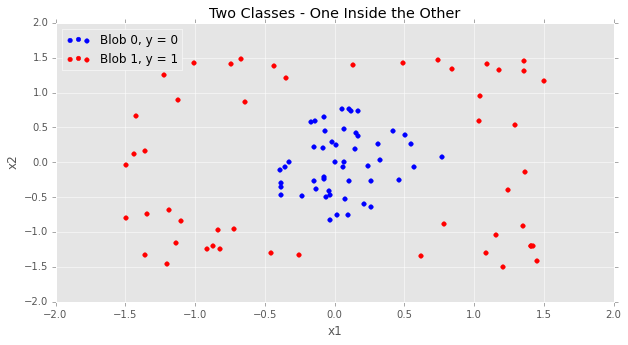

In [25]:
#Plot the data

fig=plt.figure(figsize=(10,5))
ax=plt.subplot(111)
ax.scatter(X[:m/2,0],X[:m/2,1], color = 'blue', label='Blob 0, y = 0')
ax.scatter(X[m/2:m,0], X[m/2:m,1], color = 'red', label='Blob 1, y = 1')
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Two Classes - One Inside the Other")
ax.legend(loc='upper left')

In [28]:
#Fit a simple Logistic Regression model
clfLR1 = LogisticRegression(C=5.0) 
clfLR1.fit(X, y)
cm = pd.crosstab(y, clfLR1.predict(X), rownames=["Actual"], colnames=["Predicted"])
cm

Predicted,0,1
Actual,,
0,27,23
1,23,27


In [29]:
#Now fit with some non-linear features, regularize
clfLR2 = make_pipeline(PolynomialFeatures(2), LogisticRegression(C=5.0))
clfLR2.fit(X, y)
pd.crosstab(y, clfLR2.predict(X),rownames=["Actual"], colnames=["Predicted"])

Predicted,0,1
Actual,,
0,50,0
1,0,50


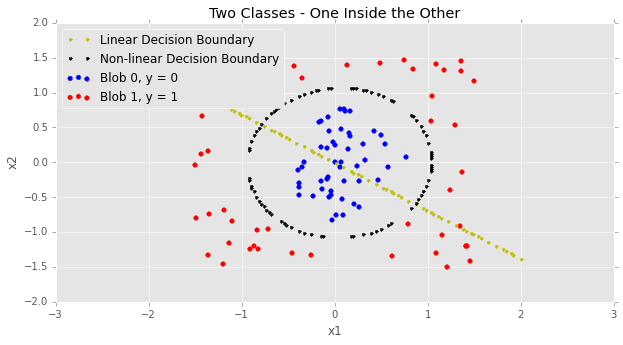

In [34]:
#Plot the decision boundaries

db1 = decision_boundary_2(clfLR1, -2, 2, -2, 2, 0.0001)
db2 = decision_boundary_2(clfLR2, -2, 2, -2, 2, 0.01)

fig=plt.figure(figsize=(10,5))
ax=plt.subplot(111)
ax.scatter(X[:m/2,0],X[:m/2,1], color = 'blue', label='Blob 0, y = 0')
ax.scatter(X[m/2:m,0], X[m/2:m,1], color = 'red', label='Blob 1, y = 1')
ax.plot(db1[:,0], db1[:,1], 'y.', label = 'Linear Decision Boundary')
ax.plot(db2[:,0], db2[:,1], 'k.', label = 'Non-linear Decision Boundary')
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Two Classes - One Inside the Other")
ax.legend(loc='upper left')